In [1]:
# Dataset : UpdatedResumeDataset.csv
# Location : 

Load libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [4]:
df.shape

(962, 2)

In [5]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

Separate the input and output data

In [6]:
x = df['Resume']
y = df['Category']

<Axes: xlabel='count', ylabel='Category'>

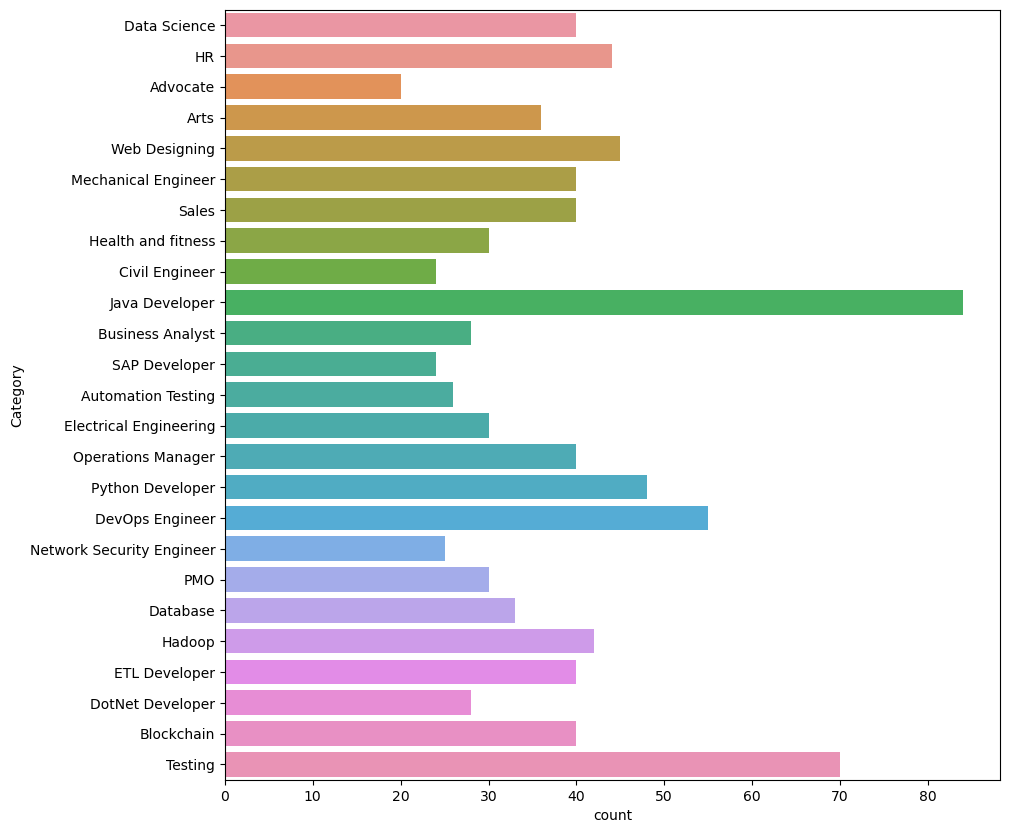

In [7]:
plt.figure(figsize=(10,10))
sns.countplot(y=y)

([<matplotlib.patches.Wedge at 0x7f5559a40e50>,
 [Text(1.058871228953308, 0.29797939609125923, 'Java Developer'),
  Text(0.7841417468169057, 0.7714413269322118, 'Testing'),
  Text(0.4134731563409379, 1.0193330903024107, 'DevOps Engineer'),
  Text(0.053862331076050214, 1.098680503736666, 'Python Developer'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'HR'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Hadoop'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Sales'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Data Science'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Mechanical Engineer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'ETL Developer'),
  Text(-0.9271404102234844, -0.5919549473825093, 'Blockchain'),
  Text(-0.7427813690411197, -0.811341998053472, 'Operations Manager'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Arts'),
  Text(-0.291057286964679, -1.0607948226234707, 'Data

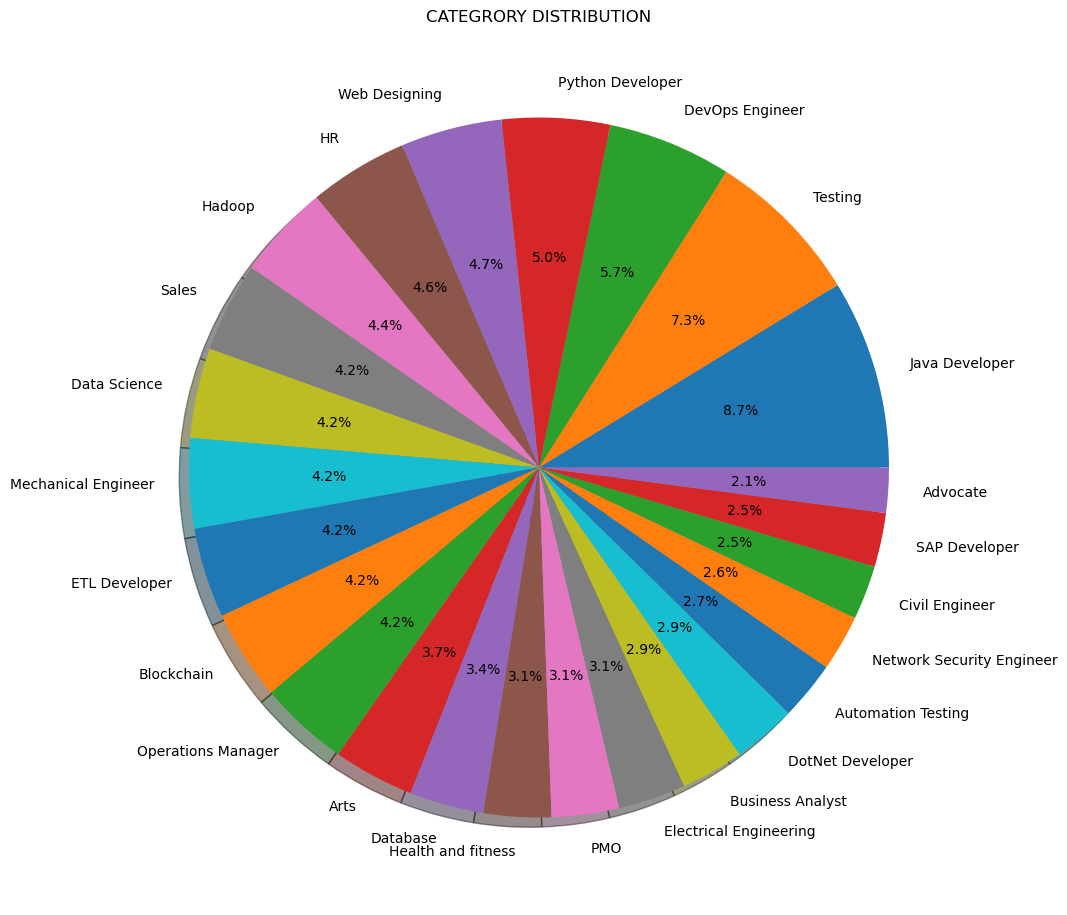

In [8]:
from matplotlib.gridspec import GridSpec
targetCounts = df['Category'].value_counts()
targetLabels = df['Category'].value_counts().index
#Make square figures and axes
plt.figure(1, figsize=(25,25))
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 1], aspect=1, title = 'CATEGRORY DISTRIBUTION')

plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)

In [9]:
import re

In [10]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*',' ', resumeText) # remove URL
    resumeText = re.sub('RT|cc',' ', resumeText) # remove RT and cc
    resumeText = re.sub('#\S+',' ', resumeText) # remove hastag
    resumeText = re.sub('@\S+',' ', resumeText) # remove mention
    resumeText = re.sub('[%s]' % 
                    re.escape("""!!"#&'()*+,-./:;<=>?@[\]^_`{|}~"""),
                        ' ', resumeText) # remove punctuation
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) # only keeping ascii values mentioned in hex format
    resumeText = re.sub('\s+',' ', resumeText) # remove extra whitespace
    return resumeText

In [11]:
cleanResume(df['Resume'][17])

'Education Details B Tech Rayat and Bahra Institute of Engineering and Biotechnology Data Science Data Science Skill Details Numpy Exprience Less than 1 year months Machine Learning Exprience Less than 1 year months Tensorflow Exprience Less than 1 year months Scikit Exprience Less than 1 year months Python Exprience Less than 1 year months GCP Exprience Less than 1 year months Pandas Exprience Less than 1 year months Neural Network Exprience Less than 1 year monthsCompany Details company Wipro description Bhawana Aggarwal E Mail bhawana chd Phone 09876971076 VVersatile high energy professional targeting challenging assignments in Machine PROFILE SUMMARY An IT professional with knowledge and experience of 2 years in Wipro Technologies in Machine Learning Deep Learning Data Science Python Software Development Skilled in managing end to end development and software products projects from inception requirement specs planning designing implementation configuration and documentation Knowled

#### Data Preparation

In [12]:
# !pip install wordcloud

In [13]:
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
import string
import nltk
from wordcloud import WordCloud


In [14]:
swords = stopwords.words('english')
totalWords = []
Sentences = df['Resume'].values
CleanedSentences = ''
for i in range(0,160):
    cleanedText =cleanResume(Sentences[i])
    CleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word.lower() not in swords:
            totalWords.append(word.lower())
     

In [15]:
len(totalWords)

33282

In [16]:
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('details', 488), ('exprience', 446), ('data', 416), ('company', 398), ('months', 394), ('description', 358), ('1', 290), ('project', 254), ('year', 252), ('january', 216), ('learning', 210), ('science', 208), ('less', 204), ('skill', 190), ('python', 176), ('maharashtra', 166), ('6', 164), ('machine', 156), ('education', 146), ('college', 146), ('arts', 144), ('university', 140), ('skills', 134), ('development', 134), ('web', 134), ('like', 126), ('analytics', 120), ('india', 120), ('management', 120), ('application', 120), ('team', 116), ('software', 116), ('using', 110), ('business', 108), ('sql', 104), ('developed', 104), ('monthscompany', 102), ('time', 100), ('used', 98), ('b', 98), ('c', 98), ('experience', 96), ('mumbai', 96), ('projects', 94), ('knowledge', 94), ('analysis', 92), ('technologies', 92), ('hr', 92), ('engineering', 90), ('pune', 90)]


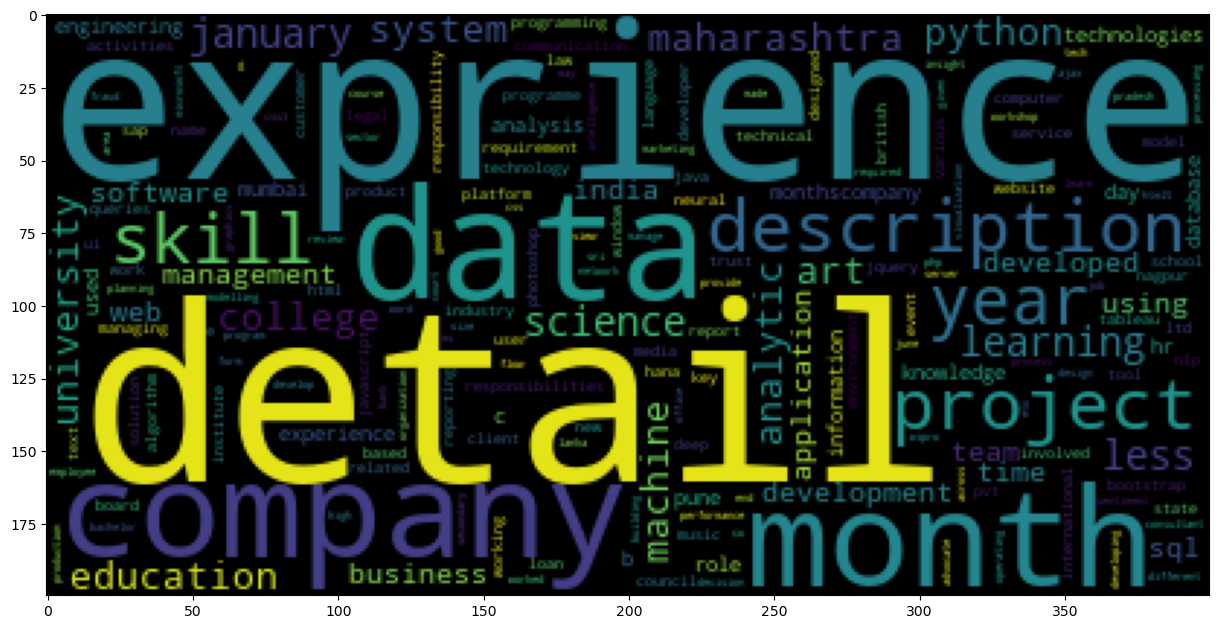

In [20]:
wc1 = WordCloud(collocations=False).generate(" ".join(totalWords))
plt.figure(figsize=(15,15))
plt.imshow(wc1)
plt.savefig('wordcloud.png')

#### TF*IDF Vectorizer

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
cleaned = x.apply(lambda a: cleanResume(a))

In [23]:
tfidf = TfidfVectorizer()

In [24]:
x_vect = tfidf.fit_transform(cleaned)

In [28]:
x_vect.shape

(962, 7566)

In [26]:
tfidf.get_feature_names_out()

array(['000', '01', '017', ..., 'zone', 'zookeeper', 'zz'], dtype=object)

#### Cross validation

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_vect, y, random_state= 0, stratify= y, test_size=0.25)

In [56]:
x_train.shape, x_test.shape

((721, 7566), (241, 7566))

#### Build the model

In [68]:
from sklearn.neighbors import NearestCentroid

In [69]:
classifier = NearestCentroid()

In [70]:
classifier.fit(x_train, y_train)

NearestCentroid()

In [71]:
y_pred = classifier.predict(x_test)
y_pred

array(['DevOps Engineer', 'Hadoop', 'Electrical Engineering', 'Sales',
       'Network Security Engineer', 'Database', 'Java Developer',
       'Civil Engineer', 'Hadoop', 'Java Developer', 'Automation Testing',
       'Java Developer', 'Health and fitness', 'Health and fitness',
       'Blockchain', 'Civil Engineer', 'Blockchain', 'DevOps Engineer',
       'Mechanical Engineer', 'Python Developer', 'DotNet Developer',
       'Network Security Engineer', 'Electrical Engineering', 'HR',
       'Operations Manager', 'Python Developer', 'Testing',
       'Web Designing', 'HR', 'SAP Developer', 'Electrical Engineering',
       'Health and fitness', 'Arts', 'Network Security Engineer',
       'Health and fitness', 'Java Developer', 'Business Analyst',
       'Web Designing', 'Health and fitness', 'Testing', 'Java Developer',
       'Java Developer', 'Mechanical Engineer', 'Java Developer',
       'Hadoop', 'Blockchain', 'Java Developer', 'DotNet Developer',
       'Sales', 'Automation Testi

In [72]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay


acc = accuracy_score(y_test, y_pred)
acc

0.991701244813278

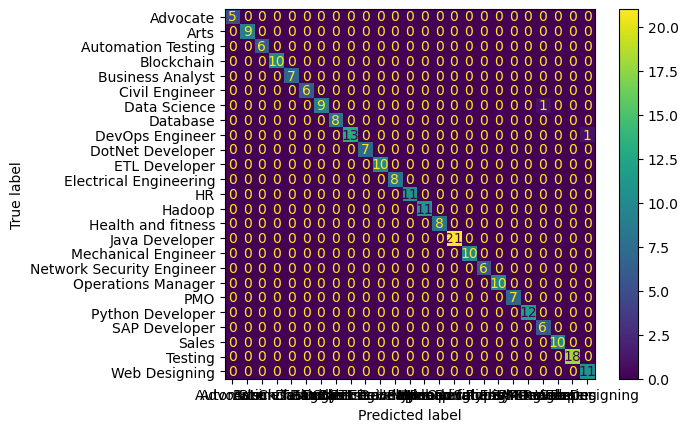

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [74]:
from sklearn.metrics import classification_report


print(classification_report(y_test, y_pred))

                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         5
                     Arts       1.00      1.00      1.00         9
       Automation Testing       1.00      1.00      1.00         6
               Blockchain       1.00      1.00      1.00        10
         Business Analyst       1.00      1.00      1.00         7
           Civil Engineer       1.00      1.00      1.00         6
             Data Science       1.00      0.90      0.95        10
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         7
            ETL Developer       1.00      1.00      1.00        10
   Electrical Engineering       1.00      1.00      1.00         8
                       HR       1.00      1.00      1.00        11
                   Hadoop       1.00      1.00      1.00     

In [75]:
# sample.csv
# UpdatedResumeDataset.csv
# Sample_Resume.txt

In [99]:
text = pd.read_csv('Sample_resume.txt', sep='\n\n', header=None)[0].str.cat()
sample = pd.DataFrame([text], columns=['text'])
sample 

,text
0,Tejashree PisheJr. Machine Learning Engineer. ...


In [100]:
x_vect = tfidf.transform(sample['text'])

In [101]:
y_pred = classifier.predict(x_vect)
y_pred

array(['Data Science'], dtype=object)

In [107]:
f = open('Sample_resume.txt')
text = cleanResume(f.read())
x_vect = tfidf.transform([text])
y_pred = classifier.predict(x_vect)
y_pred

array(['Data Science'], dtype=object)